<a href="https://colab.research.google.com/github/Tahan402/Retail-Sales-Prediction-Capstone/blob/main/Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## Loading Libraries & Data

In [29]:
#Importing important libraries and modules
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime as dt

In [2]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading Rossman Dataset
rossman_df= pd.read_csv('/content/drive/MyDrive/Retail Sales Prediction Regression Model - Taha Nakedar/Rossmann Stores Data.csv',low_memory=False)


In [4]:
#Loading Store Dataset
store_df=pd.read_csv('/content/drive/MyDrive/Retail Sales Prediction Regression Model - Taha Nakedar/store.csv',low_memory=False)


## **Analysing of Both Datasets**

In [5]:
rossman_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [6]:
store_df.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


## **Information About Datasets**

In [7]:
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
#checking null values
rossman_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

There are  1017209 rows or observations and 9 columns in this dataset. There seems to be no null values in it. It has integer, datetime and object as data types. 

In [9]:
#checking for store dataset
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [10]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

**Heatmap for null values**

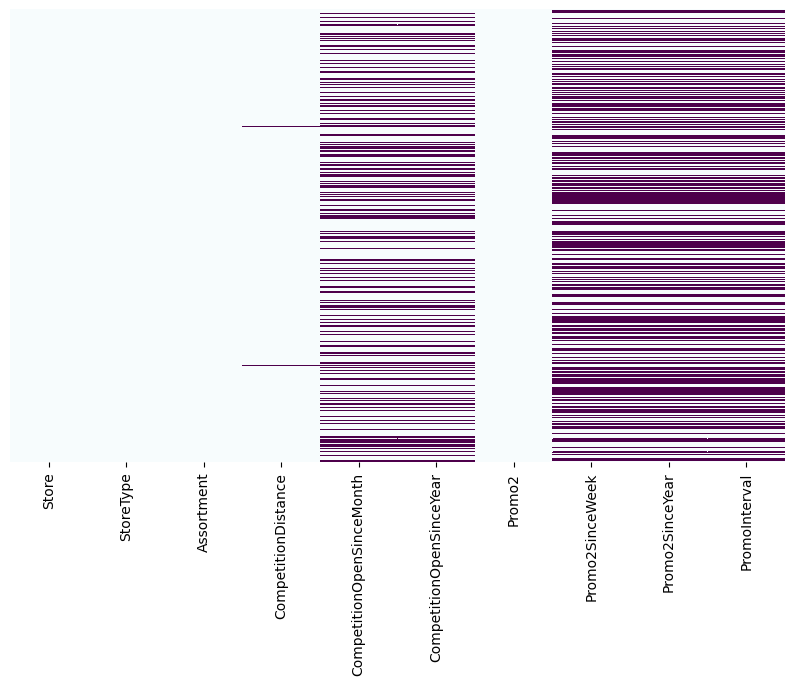

In [11]:
# creating heatmap for null values
plt.figure(figsize=(10,6))
sns.heatmap(store_df.isnull(),yticklabels= False, cbar= False, cmap= "BuPu")
plt.show()

Out of 1115 entries there are missing values for the columns:
* CompetitionDistance

* CompetitionOpenSinceMonth    
* CompetitionOpenSinceYear    
* Promo2SinceWeek, Promo2SinceYear and PromoInterval

#### **Replace missing values in features with low percentages of missing values**

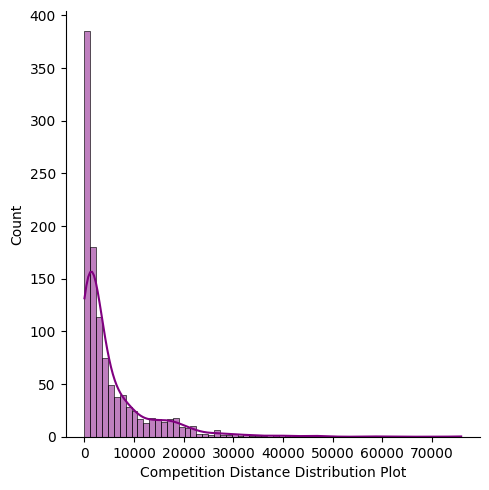

In [12]:
#distribution plot of competition distance
sns.displot(x=store_df['CompetitionDistance'], kde = True,color='purple')
plt.xlabel('Competition Distance Distribution Plot')
plt.show()

#### **The distribution is right skewed, so we'll replace missing values with the median.**

In [13]:
# filling competition distance with the median value
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

### **Remove features with high percentages of missing values**

#### **we can see that some features have a high percentage of missing values and they won't be accurate as indicators, so we will remove features with more than 30% missing values.**

In [14]:
# remove features
store_df = store_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

In [15]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store                1115 non-null   int64  
 1   StoreType            1115 non-null   object 
 2   Assortment           1115 non-null   object 
 3   CompetitionDistance  1115 non-null   float64
 4   Promo2               1115 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 43.7+ KB


In [16]:
store_df.isnull().sum()

Store                  0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64

After that, there seem to be no null values in it.

####Merging the two Datasets

In [33]:
#merge the datasets on stores data
new_df = rossman_df.merge(right=store_df, on="Store", how="left")

In [34]:
#first five rows of the merged dataset
new_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,0


In [21]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1017209 non-null  int64  
 1   DayOfWeek            1017209 non-null  int64  
 2   Date                 1017209 non-null  object 
 3   Sales                1017209 non-null  int64  
 4   Customers            1017209 non-null  int64  
 5   Open                 1017209 non-null  int64  
 6   Promo                1017209 non-null  int64  
 7   StateHoliday         1017209 non-null  object 
 8   SchoolHoliday        1017209 non-null  int64  
 9   StoreType            1017209 non-null  object 
 10  Assortment           1017209 non-null  object 
 11  CompetitionDistance  1017209 non-null  float64
 12  Promo2               1017209 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 108.6+ MB


In [32]:
#checking any null values present or not
new_df.isnull().sum()

Store                  0
DayOfWeek              0
Date                   0
Sales                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64

No null value is present in the merge dataset.





In [23]:
#creating a categorical column list 
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                         'Promo2']

In [26]:
#checking the unique values involved and if all the values are in appropriate datatypes
for col in categorical_variables:
  print(f'Unique values for {col}: {new_df[col].unique()}')

Unique values for DayOfWeek: [5 4 3 2 1 7 6]
Unique values for Open: [1 0]
Unique values for Promo: [1 0]
Unique values for StateHoliday: ['0' 'a' 'b' 'c']
Unique values for SchoolHoliday: [1 0]
Unique values for StoreType: ['c' 'a' 'd' 'b']
Unique values for Assortment: ['a' 'c' 'b']
Unique values for Promo2: [0 1]


In [27]:
#change into int type
new_df['StateHoliday'].replace({'0':0}, inplace=True)

In [38]:
#creating features from the date
new_df["Date"]=pd.to_datetime(new_df["Date"])
new_df["Year"]=new_df["Date"].dt.year
new_df["Month"]=new_df["Date"].dt.month
new_df["Day"]=new_df["Date"].dt.day
new_df["Week"]=new_df["Date"].dt.week%4
new_df["WeekOfYear"]=new_df["Date"].dt.week

<ipython-input-38-3ba1abb49e0f>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  new_df["Week"]=new_df["Date"].dt.week%4
<ipython-input-38-3ba1abb49e0f>:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  new_df["WeekOfYear"]=new_df["Date"].dt.week


In [39]:
new_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,Day,Week,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0,2015,7,31,3,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1,2015,7,31,3,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,1,2015,7,31,3,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,0,2015,7,31,3,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,0,2015,7,31,3,31


In [41]:
#Remove the column date; we rarely have it in that column. 
new_df = new_df.drop(['Date'], axis=1)

In [42]:
new_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,Day,Week,WeekOfYear
0,1,5,5263,555,1,1,0,1,c,a,1270.0,0,2015,7,31,3,31
1,2,5,6064,625,1,1,0,1,a,a,570.0,1,2015,7,31,3,31
2,3,5,8314,821,1,1,0,1,a,a,14130.0,1,2015,7,31,3,31
3,4,5,13995,1498,1,1,0,1,c,c,620.0,0,2015,7,31,3,31
4,5,5,4822,559,1,1,0,1,a,a,29910.0,0,2015,7,31,3,31


# Outliers Detection

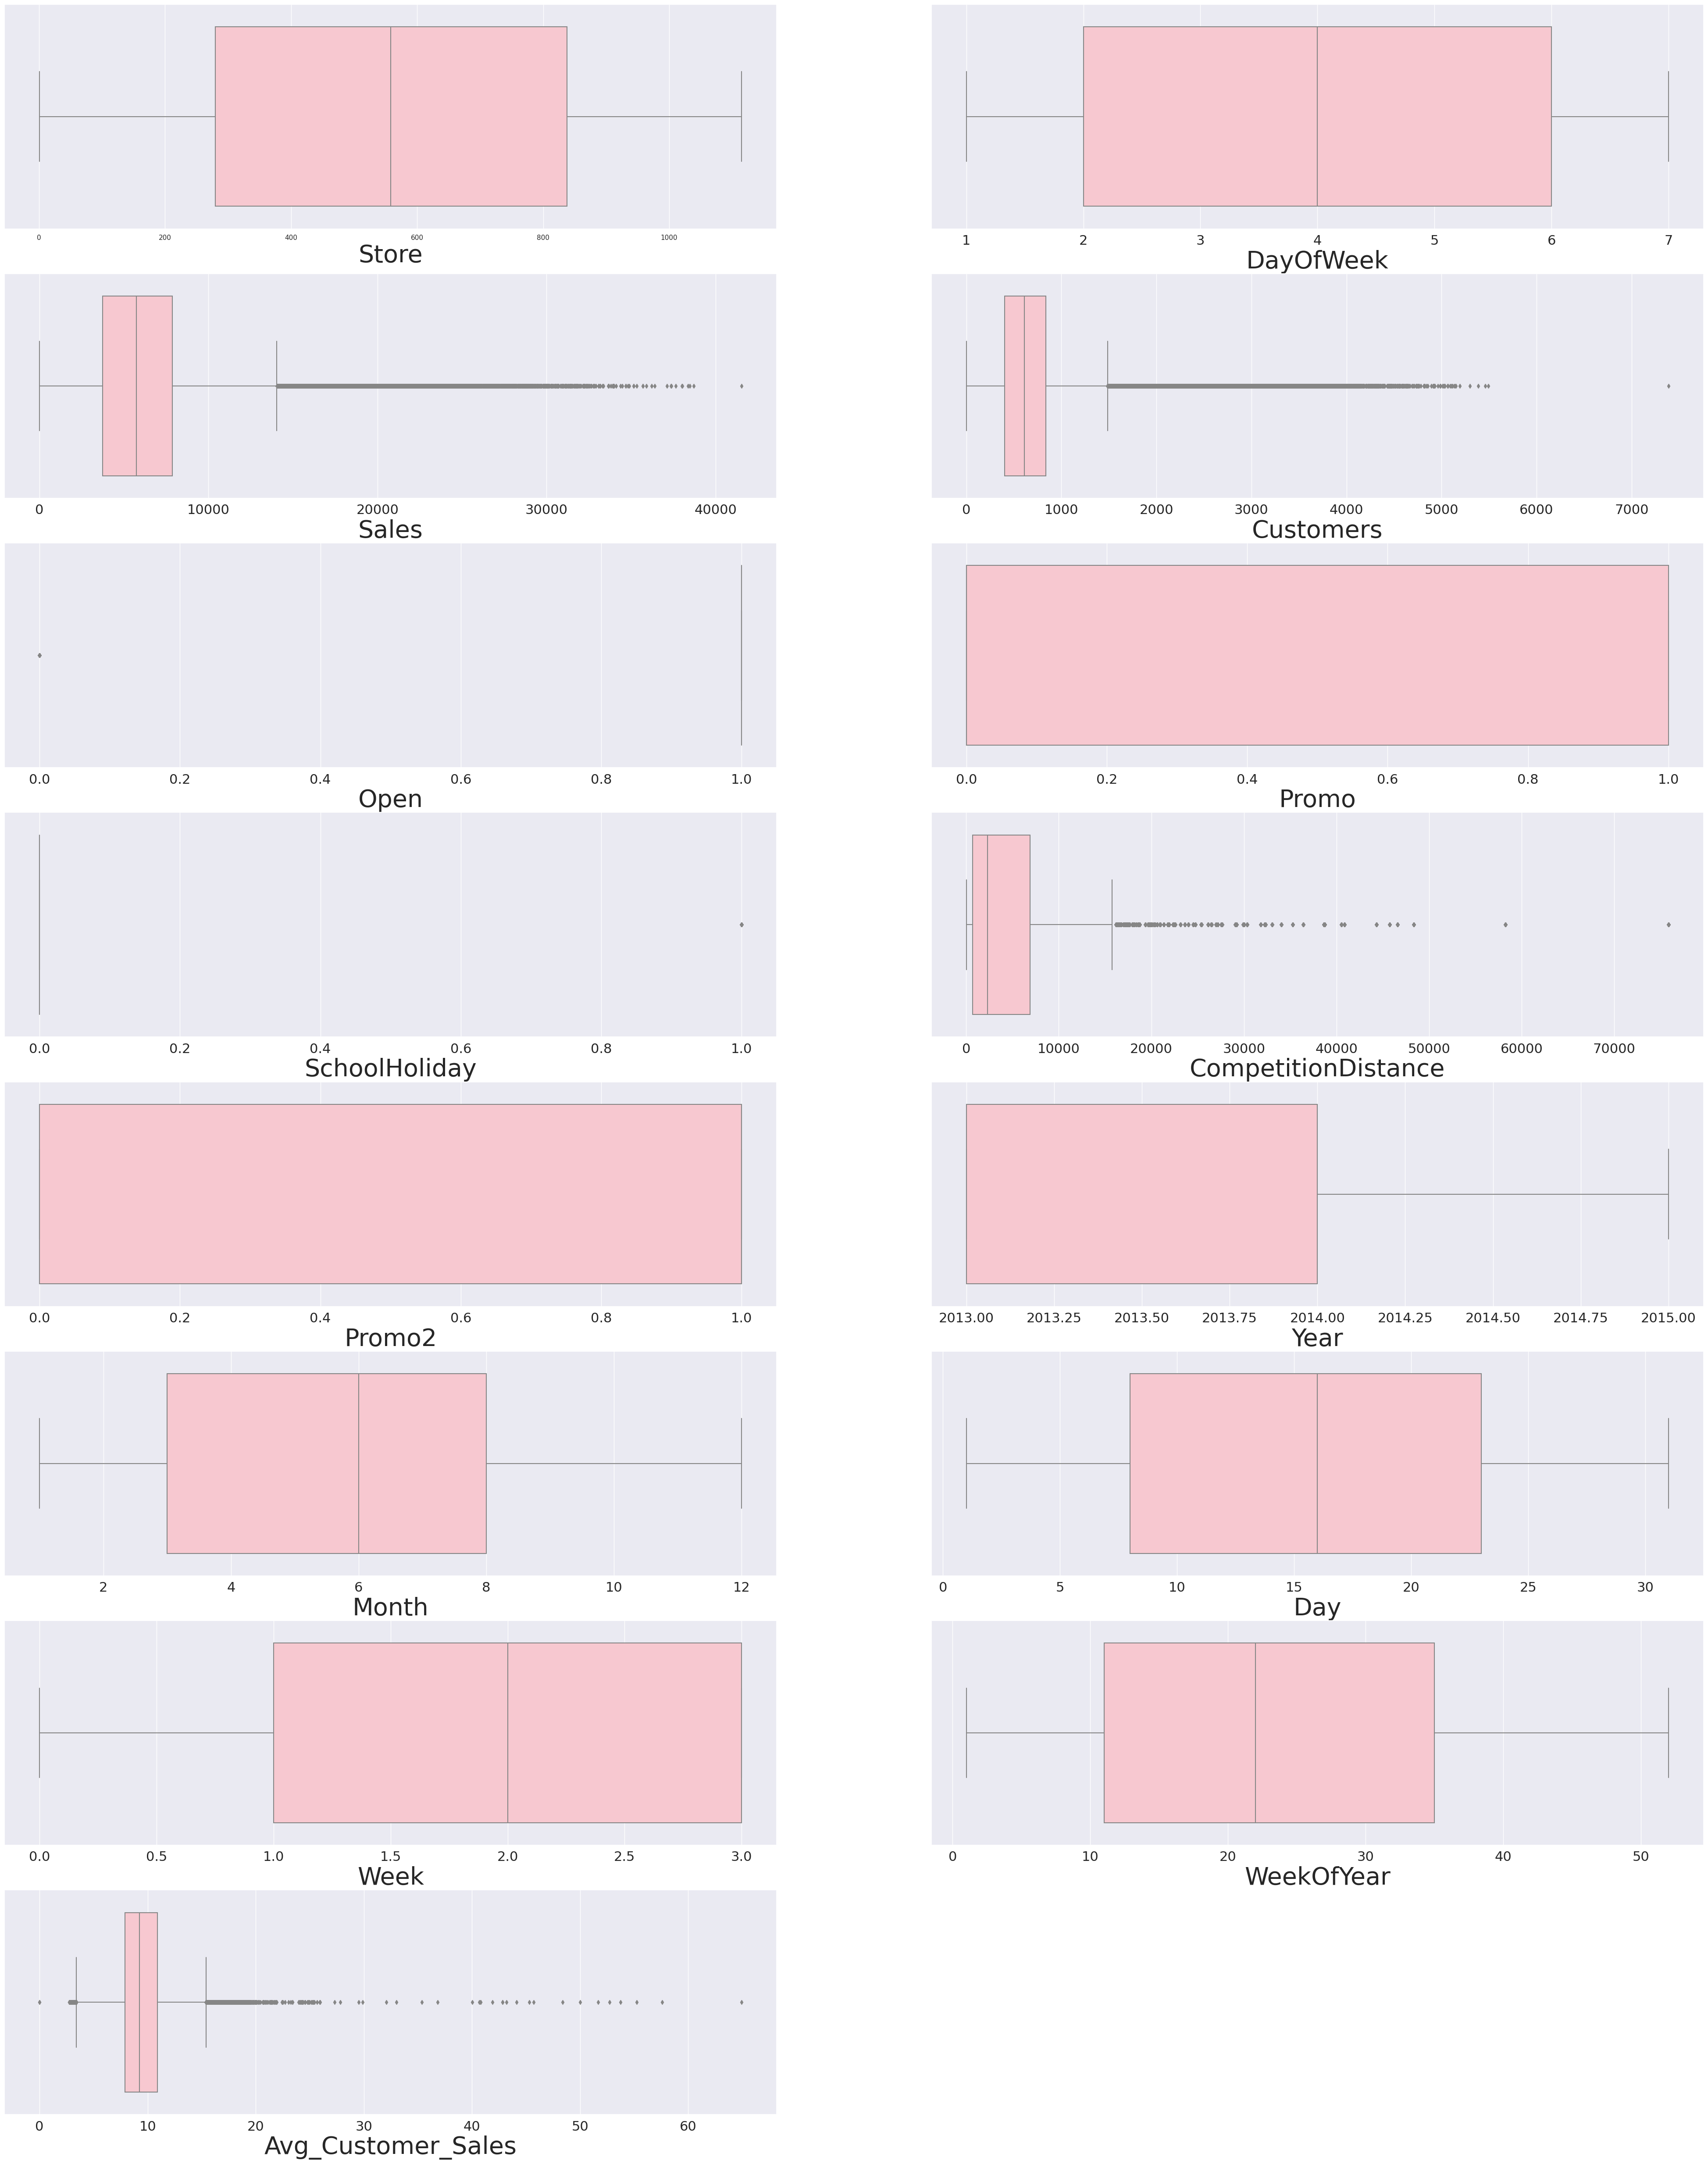

In [57]:
# Box plot to detect outliers
import warnings
warnings.filterwarnings('ignore')

lst_box = new_df.describe().columns
plt.figure(figsize = (50,80))
sns.set_theme()
for i in enumerate(lst_box):
  plt.subplot(10, 2, i[0]+1)
  sns.set(font_scale = 2)
  sns.boxplot(new_df[i[1]], color= 'pink')
  plt.xlabel(i[1], fontsize=40)

plt.show()  

### Here '`Sales`' and '`Customers`' are very important columns so outliers in these columns may affect our prediction tremendously therefore we have removed them using z score method and we tried to remove least number of rows required, by only removing those rows which does not follow the trend pattern.

In [59]:
# Removing outliers using z score method on sales column.
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore

new_df['z_sale'] = np.abs(stats.zscore(new_df['Sales']))

new_df = new_df[(new_df['z_sale'] < 3)]

new_df.drop(['z_sale'],axis=1,inplace=True)

In [60]:
# Removing outliers using z score method on customers column.

new_df['z_customer'] = np.abs(stats.zscore(new_df['Customers']))

new_df = new_df[(new_df['z_customer'] < 3)]

new_df.drop(['z_customer'],axis=1,inplace=True)

In [61]:
# Shape of our dataset after removing outliers
new_df.shape

(996977, 18)

## **EDA On Merged Dataset**

Exploratory data analysis is a crucial part of data analysis. It involves exploring and analyzing the dataset given to find patterns, trends and conclusions to make better decisions related to the data, often using statistical graphics and other data visualization tools to summarize the results. Python libraries like pandas are used to explore the data and matplotlib and seaborn to visualize it. It includes analyzing what our dataset consists of. Exploring continuous as well as categorical variables and their influence on our dependent variable-'Sales'.

#### **Heatmap Of Merged Dataset**

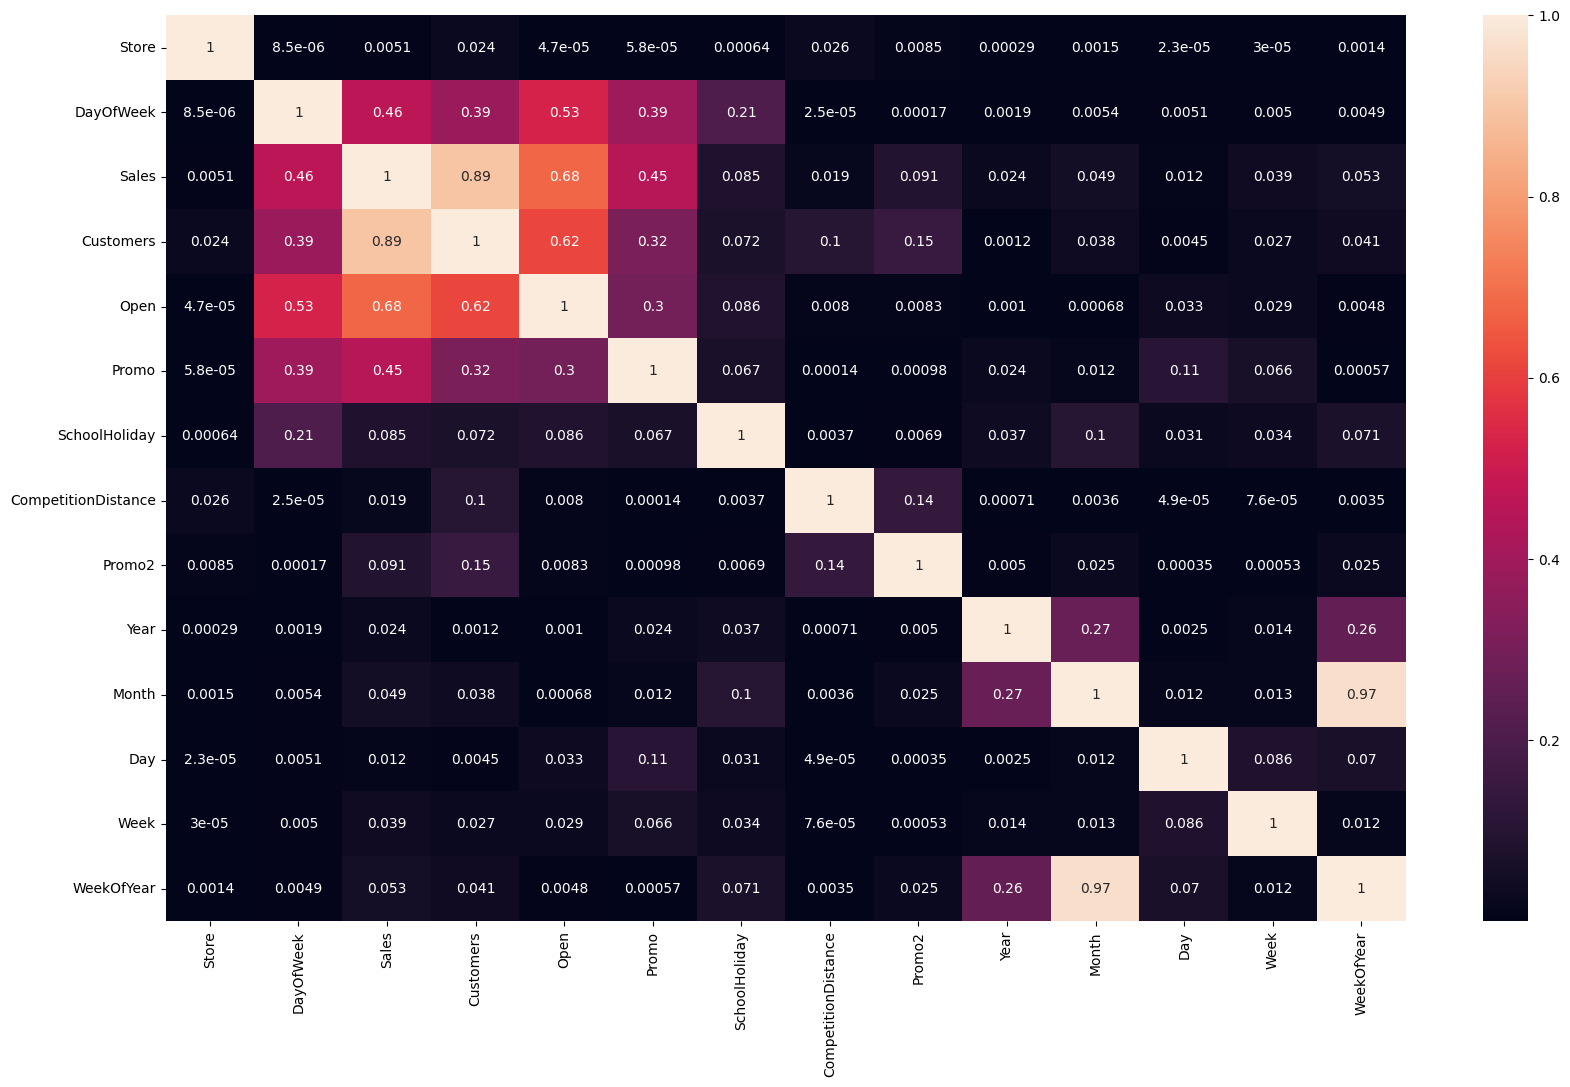

In [43]:
plt.subplots(figsize=(20,12))
sns.heatmap(new_df.corr().abs(), annot=True)
plt.savefig("heatmap.png")


Just By Observing the Above Heatmap.



*   Customers would have a positive correlation with Sales.
*   Month and WeekofYear They are highly correlated with one another. 



### Here we Know that our Target Variable is `Sales` So will visualize it how it can help us out through.


In [45]:
#Create a new column
new_df["Avg_Customer_Sales"] = new_df.Sales/new_df.Customers

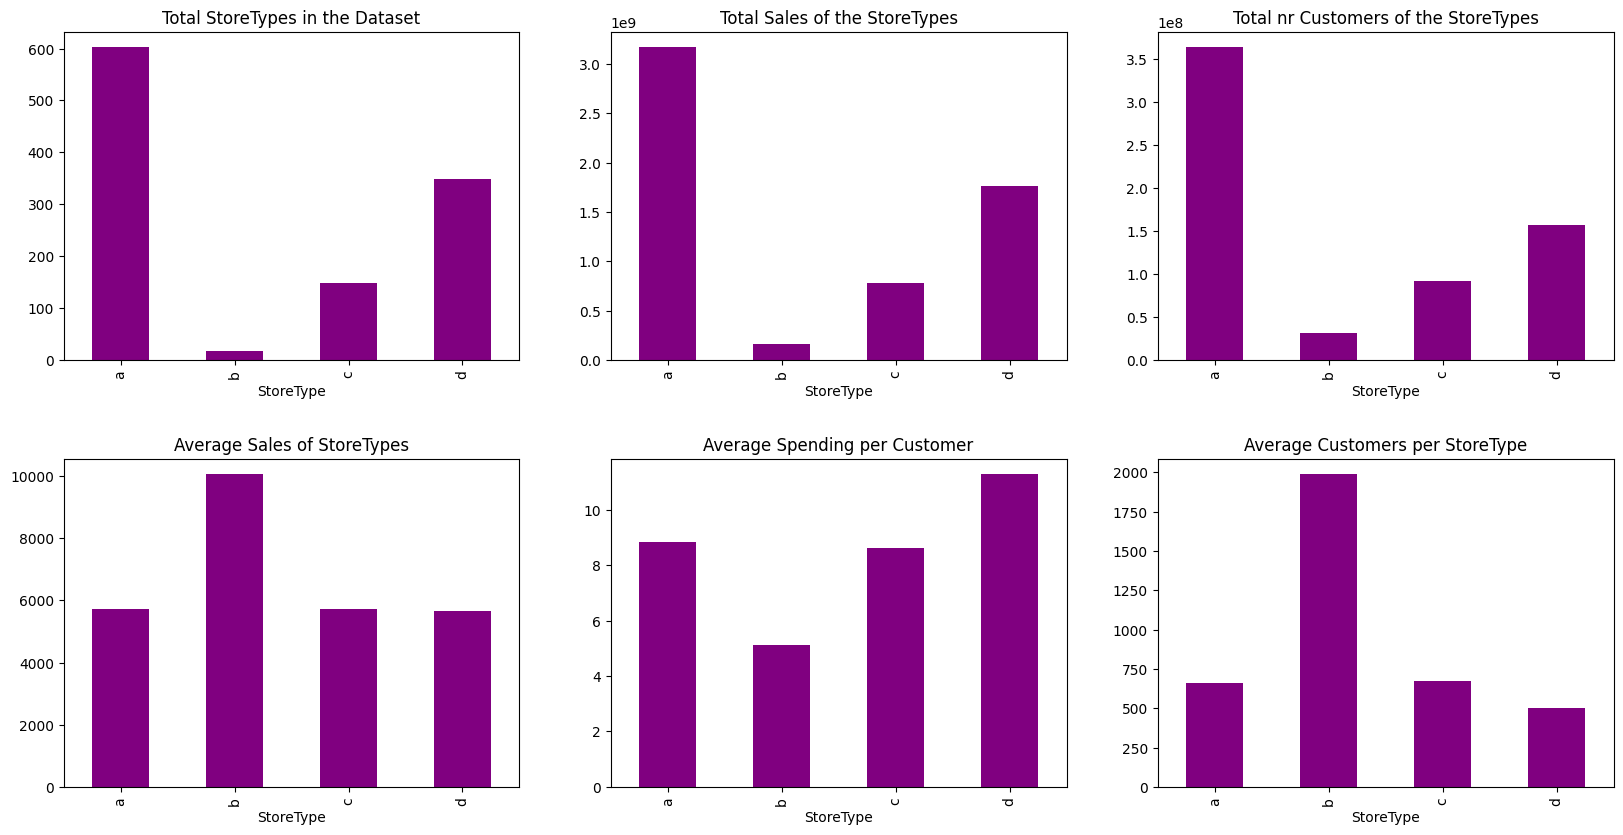

In [48]:
f, ax = plt.subplots(2, 3, figsize = (20,10))

store_df.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset",color='purple')
new_df.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes",color='purple')
new_df.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total nr Customers of the StoreTypes",color='purple')
new_df.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes",color='purple')
new_df.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer",color='purple')
new_df.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType",color='purple')

plt.subplots_adjust(hspace = 0.3)
plt.show()

**As we can see from the graphs, the StoreType A has the most stores, sales and customers. However the StoreType D has the best averages spendings per customers. StoreType B, with only 17 stores has the most average customers.**


**The most selling and crowded store type is A.**
 
**StoreType B has the lowest Average Sales per Customer. So i think customers visit this type only for small things.**
 
**StoreTybe D had the highest buyer cart.**



###Categorical Features:

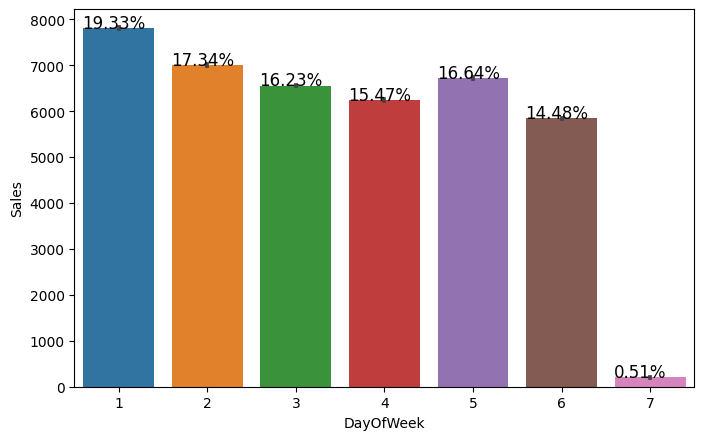

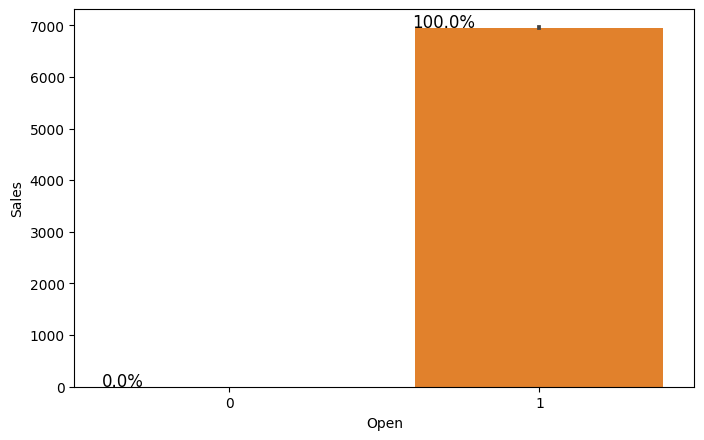

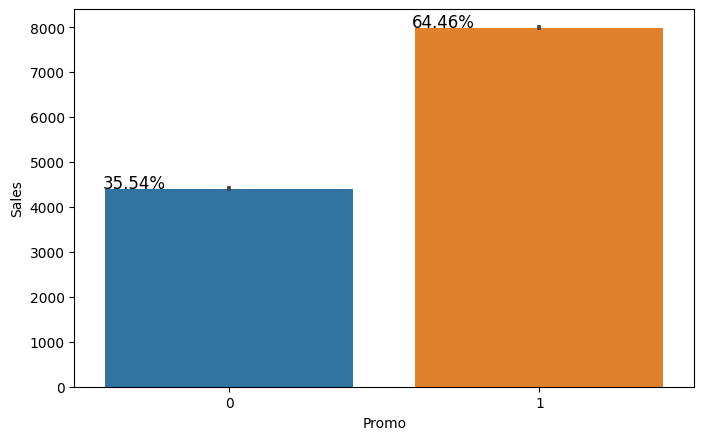

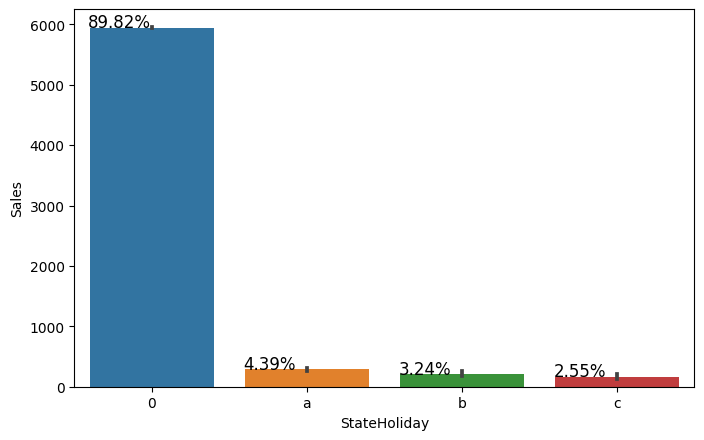

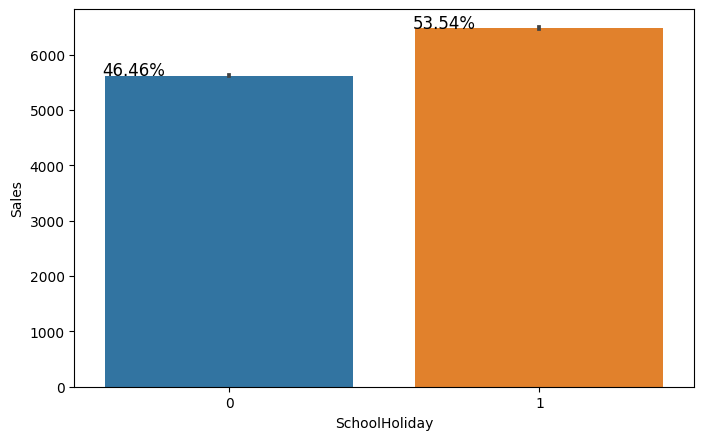

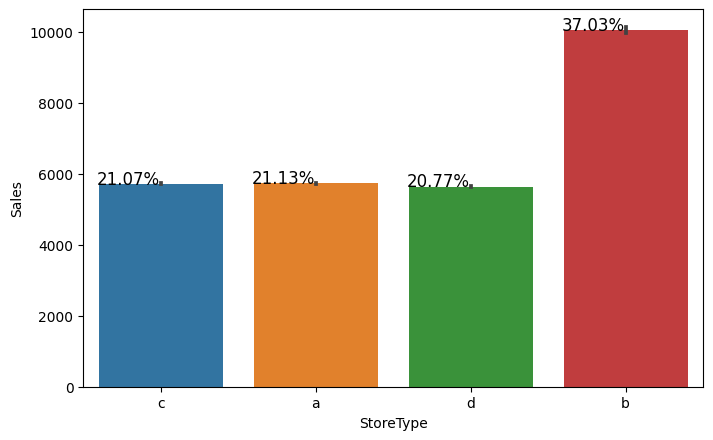

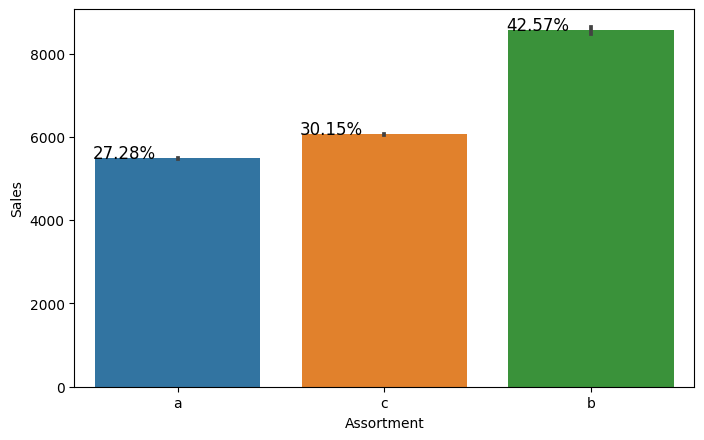

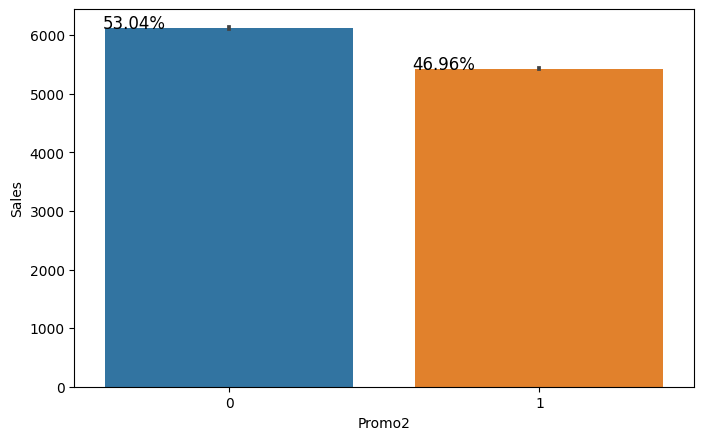

In [49]:
#code for barplots of the categorical variables against sales
#iterating over the categorical variables and plotting each of them
for value in categorical_variables:
  ax = sns.barplot(x=new_df[value], y=new_df['Sales']) 
  totals = []
  for i in ax.patches: #for every patch in the barplot ax
      totals.append(i.get_height()) #append height for each patch

  total = sum(totals) #sum of each patch height for a plot

  for i in ax.patches:  
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)  #text position and formula for percentage
  plt.show()

####Observation:
*  There were more sales on Monday, probably because shops generally remain closed on Sundays.
* It could be seen that the Promo leads to more sales.
* Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None. Lowest of Sales were seen on state holidays especially on Christmas.
* More stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.
* On an average Store type B had the highest sales.
* Highest average sales were seen with Assortment levels-b which is 'extra'.
* With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo.

# Sales Distribution

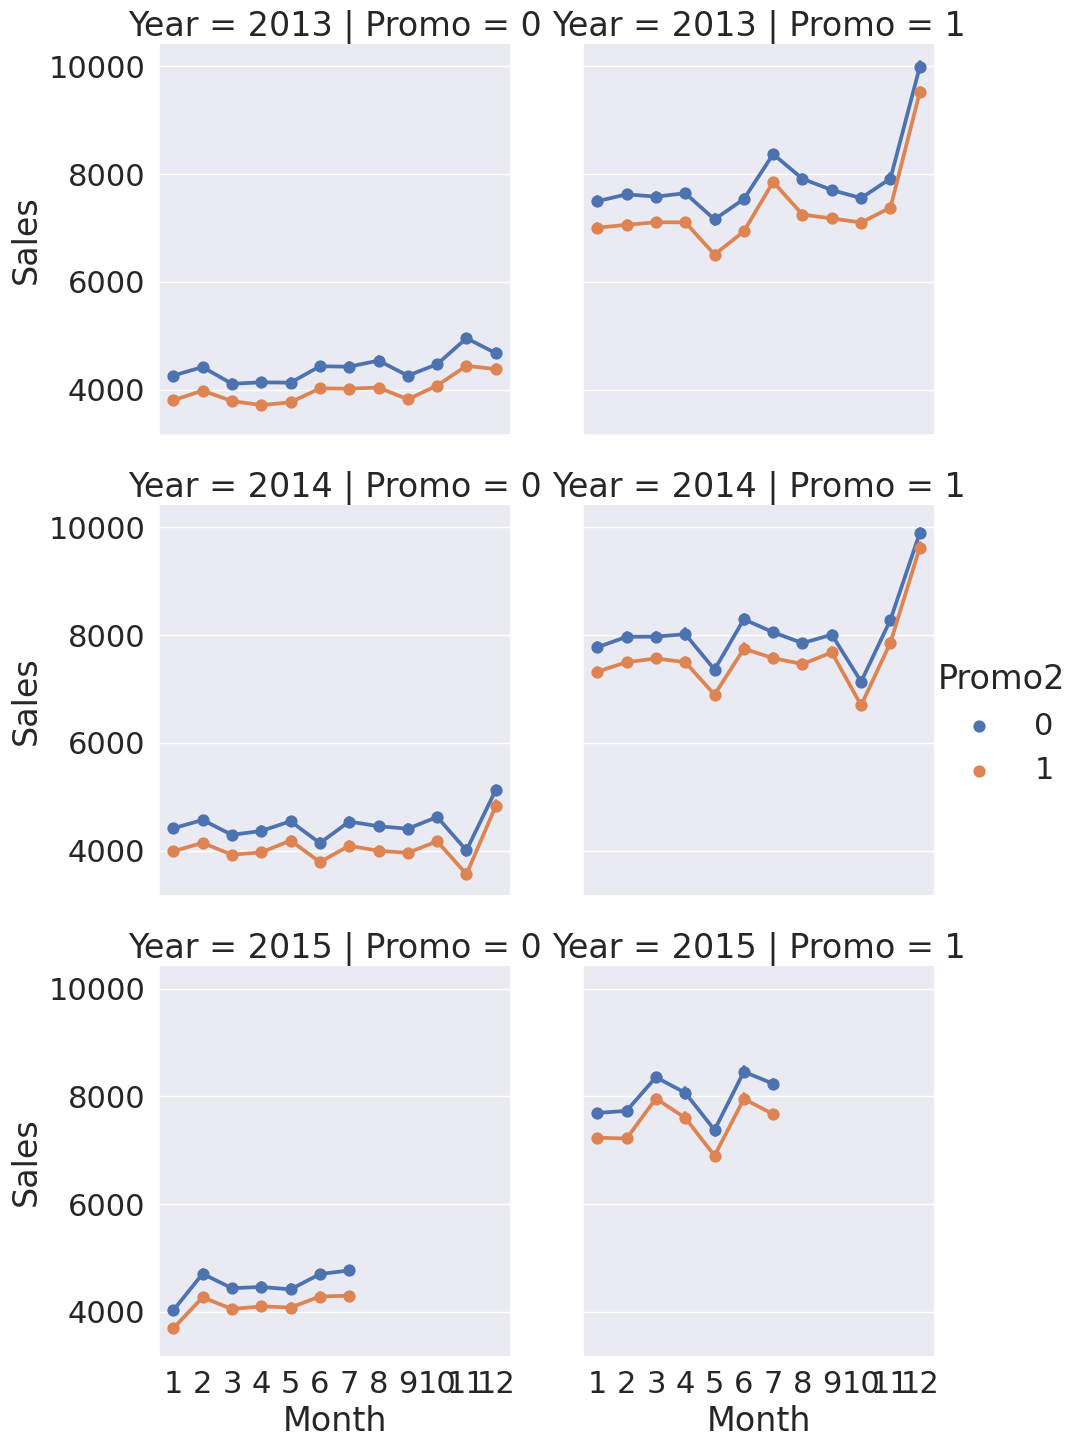

In [66]:
#promotion effect on sales
sns.factorplot(data = new_df, x ="Month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
             )
plt.show()

**Observation:**

 


### Here we can see from the graph that there is a linear relationship between customer and sales and it is also noticiable that whenever promo was open, the store has higher sales and customer compared to the period when promo was closed, which means promo had good impact on the sales.

Text(0.5, 1.0, 'Sales Distribution')

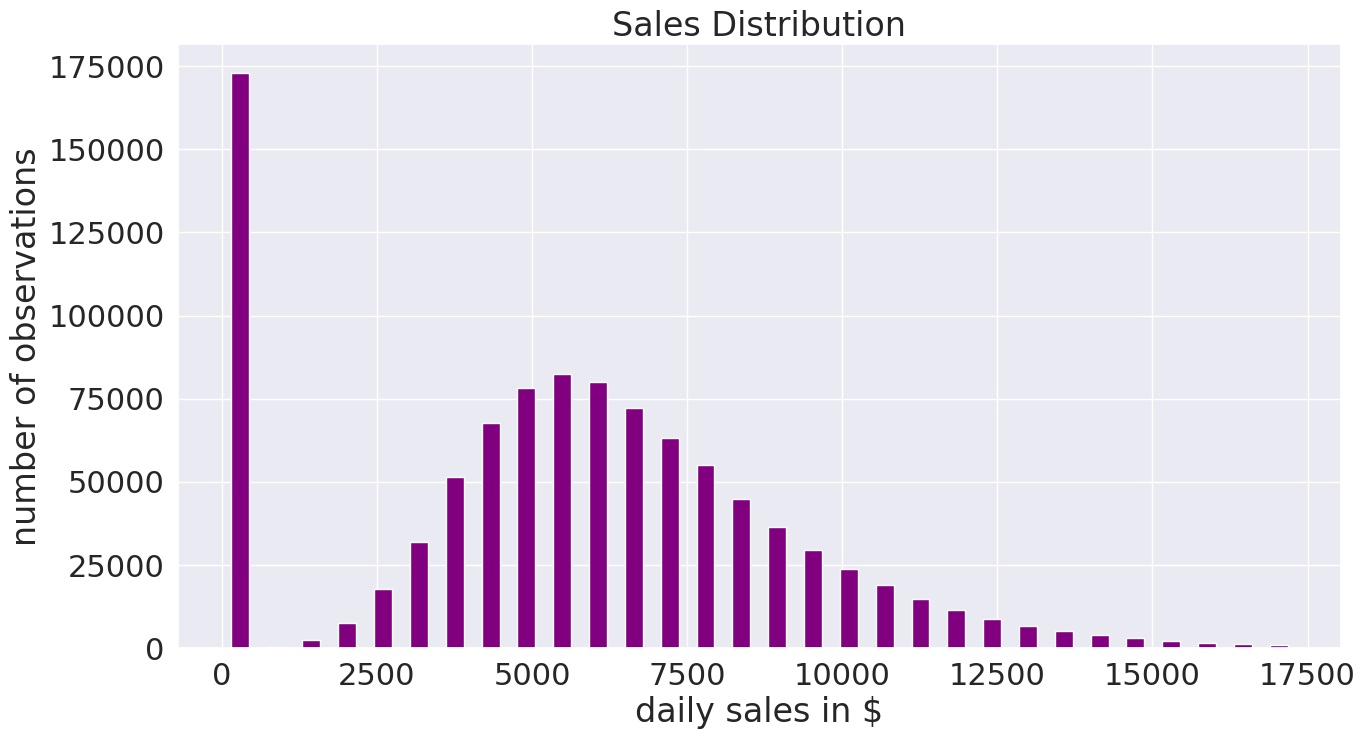

In [67]:
plt.figure(figsize=(15,8))
plt.hist(x=new_df.Sales, bins=30,color = "purple",rwidth=0.5)
plt.ylabel('number of observations')
plt.xlabel('daily sales in $')
plt.title('Sales Distribution')